## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [20]:
# import data
import pandas as pd

df = pd.read_csv("/Users/sarahedens/Downloads/House Regression project/02 Data/train.csv")


## 2. Data cleanup for regression

In [5]:
# Display first few rows of the dataset

print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
# Get summary of the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Check for missing values

print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [8]:
# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [10]:
# Fill missing values for numerical columns with the median
num_cols_with_missing = df.select_dtypes(include=['int64', 'float64']).columns[df.isnull().sum() > 0]
df[num_cols_with_missing] = df[num_cols_with_missing].fillna(df[num_cols_with_missing].median())

# Fill missing values for categorical columns with the mode
cat_cols_with_missing = df.select_dtypes(include=['object']).columns[df.isnull().sum() > 0]
df[cat_cols_with_missing] = df[cat_cols_with_missing].fillna(df[cat_cols_with_missing].mode().iloc[0])


IndexError: boolean index did not match indexed array along dimension 0; dimension is 38 but corresponding boolean dimension is 81

In [11]:
# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

# Separate numerical and categorical columns with missing values
num_cols_with_missing = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col in missing_values.index]
cat_cols_with_missing = [col for col in df.select_dtypes(include=['object']).columns if col in missing_values.index]

# Fill missing values for numerical columns with the median
df[num_cols_with_missing] = df[num_cols_with_missing].fillna(df[num_cols_with_missing].median())

# Fill missing values for categorical columns with the mode
df[cat_cols_with_missing] = df[cat_cols_with_missing].fillna(df[cat_cols_with_missing].mode().iloc[0])


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [12]:
# Verify no missing values remain
print(df.isnull().sum().sum())



0


In [13]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)


In [14]:
# Define the target variable
y = df['SalePrice']

# Define the features (excluding the target variable)
X = df.drop('SalePrice', axis=1)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')


Mean Squared Error: 2642483715.1947794
R-squared Score: 0.6554926552251765


In [17]:
# Print the intercept
print("Intercept:", model.intercept_)

# Print the coefficients for each feature
print("Coefficients:", model.coef_)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Intercept: -868539.9949086691
Coefficients: [ 5.41749985e-01  1.35806709e+01  1.21255457e+01  6.68096233e-01
  6.54783070e+03  5.81711900e+03  3.12329721e+02  1.35180687e+02
  1.83676736e+01  1.68547150e+01  6.72110359e+00 -1.48041519e+00
  2.20964465e+01  1.63910968e+01  3.27980213e+01 -2.38577658e+01
  2.53314249e+01  1.71652729e+03 -2.40508393e+03  2.88981654e+03
  2.16734202e+03 -2.61216006e+03 -1.24090922e+04  1.87583980e+03
  2.85729045e+03  2.16058864e+01  3.90391994e+02  2.62591080e+01
  1.68196226e+01  4.24127295e-02 -5.82942580e+00  4.85881560e+01
  3.25125878e+01  8.17528555e+01  1.95196807e+00 -4.43019113e+02
 -3.44503613e+02  2.88177017e+04  1.93095304e+04  2.01853611e+04
  1.87263760e+04  2.23504149e+04  4.86724220e+03  7.57925367e+03
  7.54097731e+03  1.81132502e+03  1.45690743e+04 -6.14326490e+03
  5.43936450e+03 -3.35166283e+04  9.82097273e+03 -7.01678612e+03
 -2.29146087e+04 -5.79280517e+02  4.75012731e+03 -4.50810665e+04
  1.32440693e+02 -9.11900799e+03 -1.02146205e+

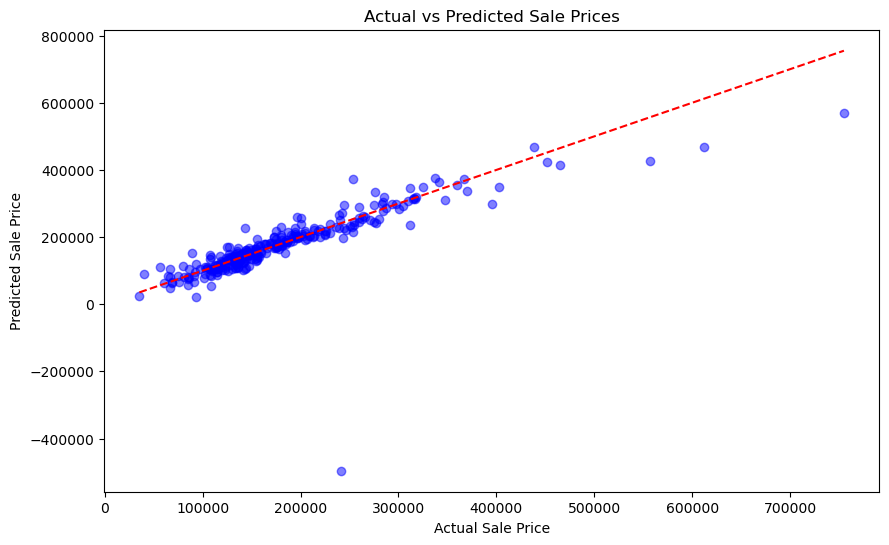

In [18]:
# Plotting the actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()


#### The scatter plot illustrates the relationship between predicted sale prices (dots) and actual sale prices (dashed red line). Our regression model predicts sale prices based on property features like size and location. The closer the dots are to the line, the more accurate our predictions. A tight cluster around the line indicates our model is effectively capturing the relationship between features and sale prices.

In [44]:
import pandas as pd

# Load train and test datasets
train_data = pd.read_csvdf = pd.read_csv("/Users/sarahedens/Downloads/House Regression project/02 Data/train.csv")
test_data = pd.read_csvdf = pd.read_csv("/Users/sarahedens/Downloads/House Regression project/02 Data/test.csv")


In [45]:
import pandas as pd

# Load the train dataset
train_df = pd.read_csv("/Users/sarahedens/Downloads/House Regression project/02 Data/train.csv")

# Load the test dataset
test_df = pd.read_csv("/Users/sarahedens/Downloads/House Regression project/02 Data/test.csv")


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant columns
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

# Subset the dataframe with selected columns
selected_df = train_df[selected_columns]

# Handle missing values if any
selected_df.dropna(inplace=True)

# Split data into independent variables (X) and dependent variable (y)
X = selected_df.drop('SalePrice', axis=1)
y = selected_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Interpret coefficients if needed
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


KeyError: "['SalePrice'] not in index"

In [24]:
df = pd.read_csv("/Users/sarahedens/Downloads/House Regression project/02 Data/train.csv")


In [27]:
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
selected_df = df[selected_columns]


In [29]:
# Identify numerical columns with missing values
num_cols_with_missing = selected_df.select_dtypes(include=['int64', 'float64']).columns[selected_df.isnull().sum() > 0]

# Fill missing values for numerical columns with the median
selected_df[num_cols_with_missing] = selected_df[num_cols_with_missing].fillna(selected_df[num_cols_with_missing].median())


In [30]:
print(selected_df.head())


   OverallQual  GrLivArea  GarageCars  TotalBsmtSF  1stFlrSF  FullBath  \
0            7       1710           2          856       856         2   
1            6       1262           2         1262      1262         2   
2            7       1786           2          920       920         2   
3            7       1717           3          756       961         1   
4            8       2198           3         1145      1145         2   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  
3       1915          1970     140000  
4       2000          2000     250000  


In [31]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = selected_df.drop(columns=['SalePrice'])  # Features
y = selected_df['SalePrice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (1168, 8)
Testing features shape: (292, 8)
Training target shape: (1168,)
Testing target shape: (292,)


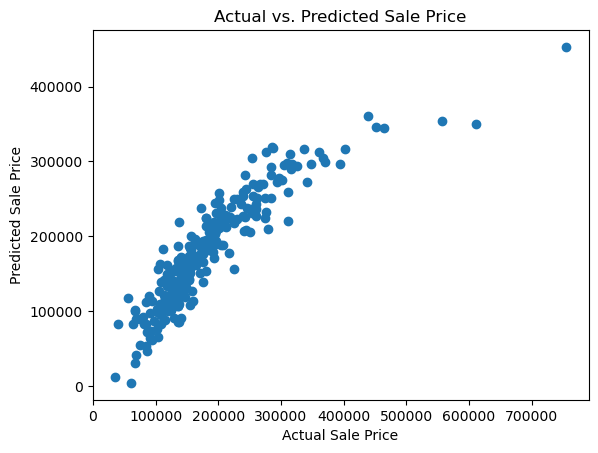

In [33]:
import matplotlib.pyplot as plt

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()


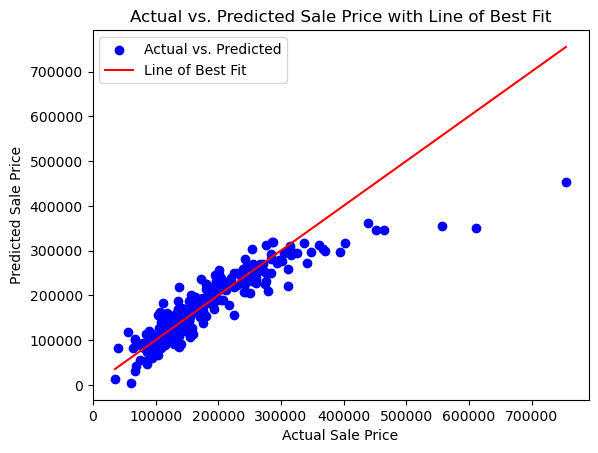

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Plotting the line of best fit
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  # This assumes a perfect fit where y_pred equals y_test
plt.plot(x_line, y_line, color='red', label='Line of Best Fit')

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price with Line of Best Fit')
plt.legend()
plt.show()


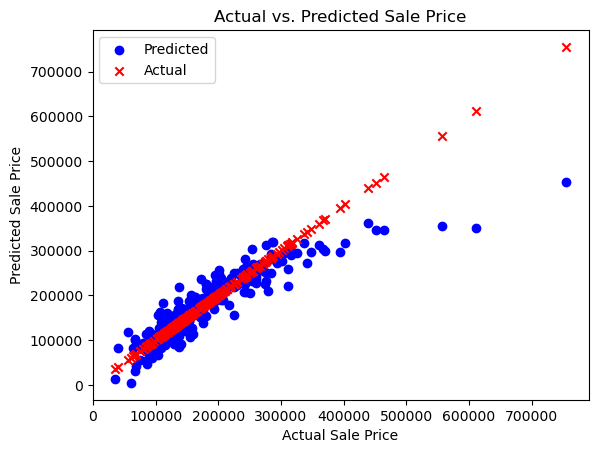

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted', marker='o')
plt.scatter(y_test, y_test, color='red', label='Actual', marker='x')

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.legend()
plt.show()


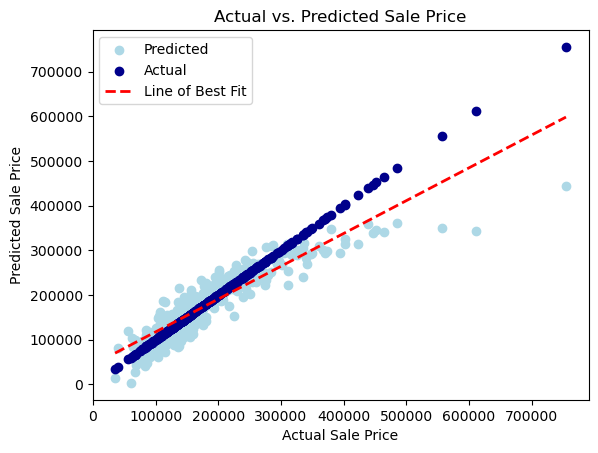

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Create graph with line of best fit / different colors for actual & predicted

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred, color='lightblue', label='Predicted')
plt.scatter(y_test, y_test, color='darkblue', label='Actual')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red', linewidth=2, linestyle='--', label='Line of Best Fit')

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.legend()
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error (MSE): 1560449382.7825801
R-squared (R2) score: 0.7965602321684269


#### The R-squared (R2) score of about 0.80 suggests that roughly 80% of the variability in house prices can be explained by the independent variables included in our model. This means our model captures a significant portion of the variation in house prices, indicating a reasonably good fit. However, there's still around 20% of the variability that our model doesn't account for, leaving room for further improvement if needed.

In [63]:
# Select relevant columns including 'LotArea'
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'SalePrice', 'LotArea']

# Subset the dataframe with selected columns
selected_df = train_df[selected_columns]

# Handle missing values if any
selected_df.dropna(inplace=True)

# Split data into independent variables (X) and dependent variables (y1 and y2)
X = selected_df.drop(['SalePrice', 'LotArea'], axis=1)
y1 = selected_df['SalePrice']
y2 = selected_df['LotArea']

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.3, random_state=42)

# Initialize the model for SalePrice prediction
model1 = LinearRegression()

# Train the model for SalePrice prediction
model1.fit(X_train, y1_train)

# Predict SalePrice on the test set
y1_pred = model1.predict(X_test)

# Initialize the model for LotArea prediction
model2 = LinearRegression()

# Train the model for LotArea prediction
model2.fit(X_train, y2_train)

# Predict LotArea on the test set
y2_pred = model2.predict(X_test)

# Evaluate the model for SalePrice prediction
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

# Evaluate the model for LotArea prediction
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print("SalePrice Model - Mean Squared Error:", mse1)
print("SalePrice Model - R-squared:", r2_1)
print("LotArea Model - Mean Squared Error:", mse2)
print("LotArea Model - R-squared:", r2_2)


SalePrice Model - Mean Squared Error: 1390303952.8503995
SalePrice Model - R-squared: 0.8007616405739935
LotArea Model - Mean Squared Error: 28907823.53929184
LotArea Model - R-squared: 0.10308354719910995


/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_1727/2749266877.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


In [64]:
# Create a copy of the DataFrame before dropping missing values
selected_df = train_df[selected_columns].copy()

# Handle missing values
selected_df.dropna(inplace=True)


In [65]:
import matplotlib.pyplot as plt

# Scatter plot of LotArea vs SalePrice
plt.scatter(X_test['LotArea'], y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test['LotArea'], y_pred, color='red', label='Predicted')

# Labeling the plot
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression: LotArea vs SalePrice')
plt.legend()

# Show plot
plt.show()


KeyError: 'LotArea'

In [66]:
print(X_test.columns)


Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')


In [67]:
# Select relevant columns
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'SalePrice']

# Subset the dataframe with selected columns
selected_df = train_df[selected_columns]

# Handle missing values if any
selected_df.dropna(inplace=True)

# Split data into independent variables (X) and dependent variable (y)
X = selected_df.drop('SalePrice', axis=1)
y = selected_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1386381873.6335893
R-squared: 0.8013236965381544


/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_1727/622614351.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


Mean Squared Error: 1390303952.8503995
R-squared: 0.8007616405739935


/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_1727/2677098076.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


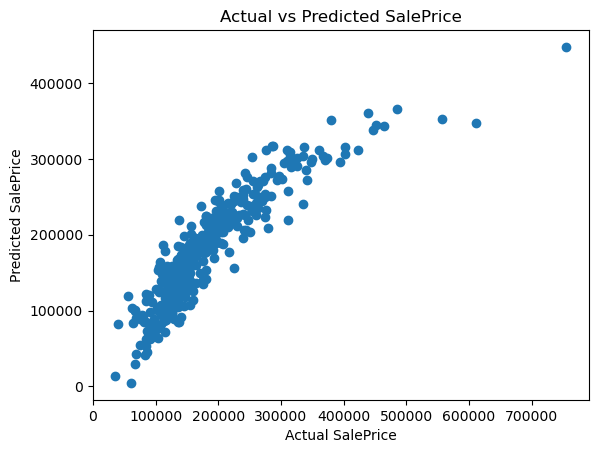

        Feature   Coefficient
0   OverallQual  19664.429907
1     GrLivArea     48.175875
2    GarageCars  15947.917522
3   TotalBsmtSF     12.126537
4      1stFlrSF     15.505244
5      FullBath  -6926.952959
6     YearBuilt    288.792559
7  YearRemodAdd    301.527869


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the selected columns
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
                    '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

# Subset the dataframe with selected columns
selected_df = train_df[selected_columns]

# Drop rows with missing values
selected_df.dropna(inplace=True)

# Split data into independent variables (X) and dependent variable (y)
X = selected_df.drop('SalePrice', axis=1)
y = selected_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()

# Interpret coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Check for outliers and handle them if necessary

# Perform cross-validation

# Fine-tune hyperparameters if using regularization

# Consider additional feature engineering

# Deploy the model if it meets performance requirements


Mean Squared Error: 1386381873.6335893
R-squared: 0.8013236965381544


/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_1727/1491694740.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


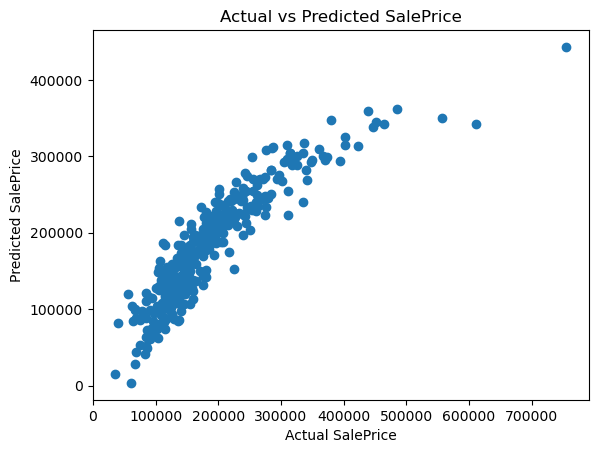

        Feature   Coefficient
0   OverallQual  20428.078789
1     GrLivArea     45.285239
2    GarageCars  15476.297865
3   TotalBsmtSF      9.617747
4      1stFlrSF     13.290341
5      FullBath  -6701.457115
6     YearBuilt    298.876125
7  YearRemodAdd    309.738396
8       LotArea      0.638594


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the selected columns
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
                    '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'SalePrice', 'LotArea']

# Subset the dataframe with selected columns
selected_df = train_df[selected_columns]

# Drop rows with missing values
selected_df.dropna(inplace=True)

# Split data into independent variables (X) and dependent variable (y)
X = selected_df.drop('SalePrice', axis=1)
y = selected_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()

# Interpret coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Check for outliers and handle them if necessary

# Perform cross-validation

# Fine-tune hyperparameters if using regularization

# Consider additional feature engineering

# Deploy the model if it meets performance requirements


#### Analysis

OverallQual: For each one-unit increase in OverallQual (overall material and finish of the house), the SalePrice is expected to increase by approximately $20,428.

GrLivArea: For each additional square foot of above-ground living area, the SalePrice is expected to increase by approximately $45.

GarageCars: For each additional car capacity in the garage, the SalePrice is expected to increase by approximately $15,476.

TotalBsmtSF: For each additional square foot of basement area, the SalePrice is expected to increase by approximately $9.62.

1stFlrSF: For each additional square foot of the first floor area, the SalePrice is expected to increase by approximately $13.29.

FullBath: For each additional full bathroom, the SalePrice is expected to decrease by approximately $6,701. This negative coefficient might seem counterintuitive, but it suggests that houses with more full bathrooms tend to have lower prices when other factors are held constant. This could be due to other variables not included in the model that correlate with the number of bathrooms.

YearBuilt: For each year increase in the year built, the SalePrice is expected to increase by approximately $298.88.

YearRemodAdd: For each year increase in the year of remodel or addition, the SalePrice is expected to increase by approximately $309.74.

LotArea: For each additional square foot of lot area, the SalePrice is expected to increase by approximately $0.64. This coefficient suggests a very small impact of lot area on sale price, which might indicate that lot area alone is not a strong predictor of sale price compared to other variables in the model.